## 1. Data Load

In [2]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(10)

In [108]:
# Load data dan ubah menjadi dataframe
df = pd.read_csv('dfTransjakarta.csv')
df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


# 2. Data Exploration

In [109]:
# Melihat gambaran data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

In [110]:
# Cek data yang masih null
df.isnull().sum()


transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [111]:
# Cek banyaknya column dan baris

df.shape

(37900, 22)

In [112]:
# Cek nama-nama kolom

df.columns

Index(['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex',
       'payCardBirthDate', 'corridorID', 'corridorName', 'direction',
       'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon',
       'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName',
       'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime',
       'payAmount'],
      dtype='object')

In [113]:
# Menghitung persentase missing value dari masing-masing column

percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
transID,transID,0.000000
payCardID,payCardID,0.000000
payCardBank,payCardBank,0.000000
payCardName,payCardName,0.000000
payCardSex,payCardSex,0.000000
payCardBirthDate,payCardBirthDate,0.000000
corridorID,corridorID,3.316623
corridorName,corridorName,5.092348
direction,direction,0.000000
tapInStops,tapInStops,3.200528


# 3. Data Cleaning

## 3.1 Ubah Bentuk Data

In [114]:
# Data tapInTime & tapOutTime yang awalnya string diubah menjadi datetime

df['tapInTime'] = df['tapInTime'].astype('datetime64[ns]')
df['tapOutTime'] = df['tapOutTime'].astype('datetime64[ns]')

## 3.2 Tambah Kolom

### 3.2.1 Kolom Age

In [115]:
# Tambah Kolom Age berdasarkan tapInTIme dan payCardbirthDate

df['Age'] = df.apply(lambda x: x['tapInTime'].year - x['payCardBirthDate'] ,axis=1)


### 3.2.2 Kolom Day

In [116]:
# Ubah kolom tapInTime ke datetime

df['tapInTime'] = pd.to_datetime(df['tapInTime'])


In [117]:
# Tambah kolom Day

df['Day'] = df['tapInTime'].apply(lambda x: x.weekday())


In [118]:
# Tambah kolom Day_Name 

days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df['Day_Name'] = df['Day'].map(lambda x: days[x])


### 3.2.3 Kolom DayTipe

In [119]:
# Tambah Kolom DayType

df['DayType'] = df['tapInTime'].dt.weekday.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')


## 3.3 ShapeFile Lokasi

In [120]:
# Install geopandas

!pip install geopandas


In [121]:
# Import geopandas dan load file dari LapakGIS.com https://drive.google.com/drive/folders/18uO66T11KkbYZ01eogOxWs-C1xykJqw-

import geopandas as gpd
from shapely.geometry import Point

# Load the shapefile
shapefile_path = r"C:\Users\PLN\Documents\Haktiv8\Final Project\[LapakGIS.com] KOTA_JAKARTA_BARAT\KOTA_JAKARTA_BARAT\ADMINISTRASIKECAMATAN_AR_25K.shp"
gdf_jakbar = gpd.read_file(shapefile_path)

shapefile_path = r"C:\Users\PLN\Documents\Haktiv8\Final Project\[LapakGIS.com] KOTA_JAKARTA_PUSAT\KOTA_JAKARTA_PUSAT\ADMINISTRASIKECAMATAN_AR_25K.shp"
gdf_jakpus = gpd.read_file(shapefile_path)

shapefile_path = r"C:\Users\PLN\Documents\Haktiv8\Final Project\[LapakGIS.com] KOTA_JAKARTA_TIMUR\KOTA_JAKARTA_TIMUR\ADMINISTRASIKECAMATAN_AR_25K.shp"
gdf_jaktim = gpd.read_file(shapefile_path)

shapefile_path = r"C:\Users\PLN\Documents\Haktiv8\Final Project\[LapakGIS.com] KOTA_JAKARTA_UTARA\KOTA_JAKARTA_UTARA\ADMINISTRASIKECAMATAN_AR_25K.shp"
gdf_jakut = gpd.read_file(shapefile_path)

shapefile_path = r"C:\Users\PLN\Documents\Haktiv8\Final Project\[LapakGIS.com] KOTA_JAKARTA_SELATAN\KOTA_JAKARTA_SELATAN\ADMINISTRASIKECAMATAN_AR_25K.shp"
gdf_jaksel = gpd.read_file(shapefile_path)

#### Shapefile Davita

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# Load the shapefile
shapefile_path = r"/Users/yuliottanjung/Downloads/drive-download-20250311T160156Z-001/KOTA_JAKARTA_BARAT/ADMINISTRASIKECAMATAN_AR_25K.shp"
gdf_jakbar = gpd.read_file(shapefile_path)

shapefile_path = r"/Users/yuliottanjung/Downloads/drive-download-20250311T160156Z-001/KOTA_JAKARTA_PUSAT/ADMINISTRASIKECAMATAN_AR_25K.shp"
gdf_jakpus = gpd.read_file(shapefile_path)

shapefile_path = r"/Users/yuliottanjung/Downloads/drive-download-20250311T160156Z-001/KOTA_JAKARTA_TIMUR/ADMINISTRASIKECAMATAN_AR_25K.shp"
gdf_jaktim = gpd.read_file(shapefile_path)

shapefile_path = r"/Users/yuliottanjung/Downloads/drive-download-20250311T160156Z-001/KOTA_JAKARTA_UTARA/ADMINISTRASIKECAMATAN_AR_25K.shp"
gdf_jakut = gpd.read_file(shapefile_path)

shapefile_path = r"/Users/yuliottanjung/Downloads/drive-download-20250311T160156Z-001/KOTA_JAKARTA_SELATAN/ADMINISTRASIKECAMATAN_AR_25K.shp"
gdf_jaksel = gpd.read_file(shapefile_path)

In [122]:
# Definisikan kota

def get_kota(point):
  if gdf_jakbar.contains(point).any():
    return 'Jakarta Barat'
  elif gdf_jakpus.contains(point).any():
    return 'Jakarta Pusat'
  elif gdf_jaktim.contains(point).any():
    return 'Jakarta Timur'
  elif gdf_jakut.contains(point).any():
    return 'Jakarta Utara'
  elif gdf_jaksel.contains(point).any():
    return 'Jakarta Selatan'

In [123]:
# Buat kota_tapin berdasarkan definisi rumus kota

df['kota_tapin'] = df.apply(lambda x: get_kota(Point(x.tapInStopsLon, x.tapInStopsLat)), axis=1)

In [124]:
# Buat kota_tapout berdasarkan definisi rumus kota

df['kota_tapout'] = df.apply(lambda x: get_kota(Point(x.tapOutStopsLon, x.tapOutStopsLat)), axis=1)

## 3.4 Drop Kolom

In [125]:
df.columns

Index(['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex',
       'payCardBirthDate', 'corridorID', 'corridorName', 'direction',
       'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon',
       'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName',
       'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime',
       'payAmount', 'Age', 'Day', 'Day_Name', 'DayType', 'kota_tapin',
       'kota_tapout'],
      dtype='object')

In [126]:
# Drop kolom yang tidak digunakan

df = df.drop(['corridorID', 'corridorName', 'direction', 'stopStartSeq', 'stopEndSeq'], axis=1)


## 3.5 Drop Row

In [127]:
#Drop column tapOutStops, tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq, tapOutTime

df = df.dropna(subset=['tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'tapOutTime'])

In [128]:
#Cek data null

df.isnull().sum()


transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
tapInStops          1151
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
tapInTime              0
tapOutStops            0
tapOutStopsName        0
tapOutStopsLat         0
tapOutStopsLon         0
tapOutTime             0
payAmount            946
Age                    0
Day                    0
Day_Name               0
DayType                0
kota_tapin          1722
kota_tapout         1797
dtype: int64

## 3.6 Fill Missing Values

### 3.6.1 payAmount

In [129]:
# Isi kolom payAmount yang missing dengan angka 0

df['payAmount'] = df['payAmount'].fillna(0)

### 3.6.2 kota_tapin & kota_tapout

In [130]:
# Isi missing values dengan "Luar Jakarta" untuk kategori kota tapin tapout yang tidak termasuk Jakarta

df['kota_tapin'].fillna("Luar Jakarta", inplace=True)
df['kota_tapout'].fillna("Luar Jakarta", inplace=True)

C:\Users\PLN\AppData\Local\Temp\ipykernel_26584\2038802020.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['kota_tapin'].fillna("Luar Jakarta", inplace=True)
C:\Users\PLN\AppData\Local\Temp\ipykernel_26584\2038802020.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

# 4. Data Anaysis

## 4.1 Perbandingan Laki-laki & Perempuan

In [131]:
# Hitung jumlah jenis kelamin

sex_counts = df['payCardSex'].value_counts()

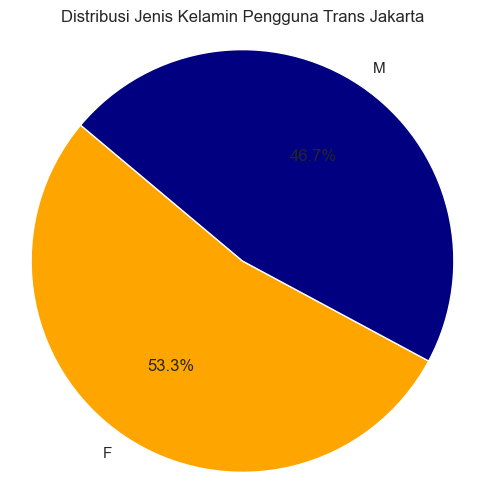

In [132]:
# Data visualisasi piechart

plt.figure(figsize=(6, 6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140, colors=['orange', 'navy'])
plt.title('Distribusi Jenis Kelamin Pengguna Trans Jakarta')
plt.axis('equal')
plt.show()

In [133]:
# Hitung jumlah berdasarkan kota dan jenis kelamin
sexbycity = df.groupby(['kota_tapin', 'payCardSex']).size().unstack(fill_value=0)

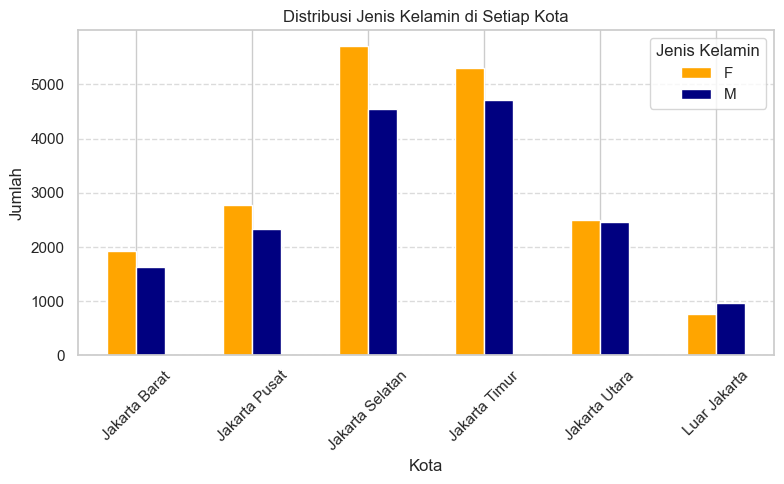

In [134]:
# Buat bar chart
sexbycity.plot(kind='bar', figsize=(8, 5), color=['orange', 'navy'])
plt.title('Distribusi Jenis Kelamin di Setiap Kota')
plt.xlabel('Kota')
plt.ylabel('Jumlah')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Jenis Kelamin')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4.2 Distribusi Usia Pengguna TransJakarta

In [135]:
Ages = np.sort(df['Age'].unique())
Ages

array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
       28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
       45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61,
       62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77],
      dtype=int64)

In [136]:
#Defini rentang usia dan labelnya
bins = [10, 17, 24, 40, 59, 80]
labels = ['11-17', '18-24', '25-40', '41-59', '60-80']

#Kolom group age
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

C:\Users\PLN\AppData\Local\Temp\ipykernel_26584\442603733.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


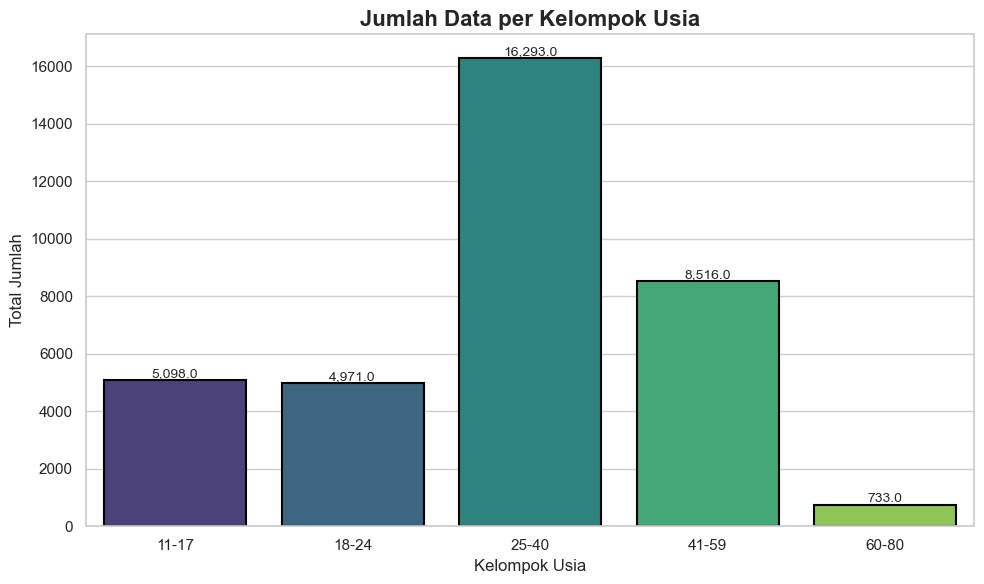

In [137]:
# Set style Seaborn
sns.set(style="whitegrid")

# Hitung jumlah per AgeGroup
age_group_counts = df['AgeGroup'].value_counts().sort_values(ascending=False)

# Buat DataFrame untuk Seaborn
age_group_df = age_group_counts.reset_index()
age_group_df.columns = ['AgeGroup', 'Count']

# Visualisasi dengan Seaborn barplot vertikal
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=age_group_df,
    x='AgeGroup',
    y='Count',
    palette='viridis',
    edgecolor='black',
    linewidth=1.5
)

# Format angka di sumbu Y agar tidak ada notasi ilmiah
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, _: int(y)))

# Tambahkan judul dan label sumbu dengan gaya tegas
plt.title('Jumlah Data per Kelompok Usia', fontsize=16, fontweight='bold')
plt.xlabel('Kelompok Usia', fontsize=12)
plt.ylabel('Total Jumlah', fontsize=12)

# Tambahkan label angka di atas setiap bar dengan posisi yang benar
for p in barplot.patches:
    barplot.annotate(
        format(p.get_height(), ','),
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()


In [138]:
age_day_counts.plot(kind='bar', stacked=False, color=['skyblue', 'lightgreen'])
plt.title('Distribusi Kelompok Usia Berdasarkan DayType')
plt.xlabel('Kelompok Usia')
plt.ylabel('Jumlah')
plt.legend(title='DayType')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

NameError: name 'age_day_counts' is not defined

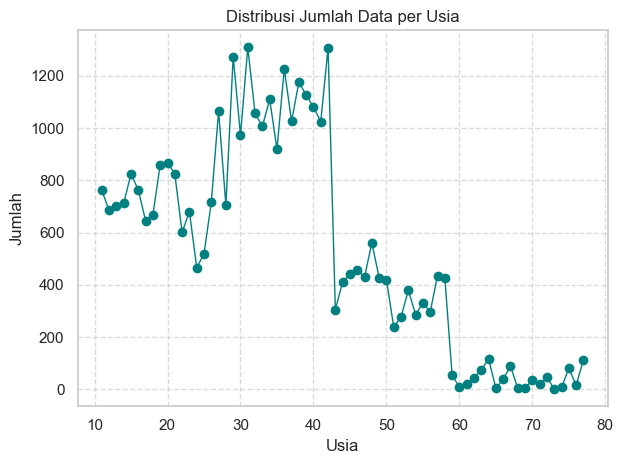

In [139]:
# Hitung jumlah per usia
age_counts = df['Age'].value_counts().sort_index()

# Visualisasi Line Chart
age_counts.plot(kind='line', marker='o', color='teal', linewidth=1)
plt.title('Distribusi Jumlah Data per Usia')
plt.xlabel('Usia')
plt.ylabel('Jumlah')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [140]:
# Cek Modus dari Usia untuk Analisa

print('Modus Usia =',df['Age'].mode())


Modus Usia = 0    31
Name: Age, dtype: int64


In [141]:
# Cek Total Value dari Masing-masing Age Group

df['AgeGroup'].value_counts().sort_index()

AgeGroup
11-17     5098
18-24     4971
25-40    16293
41-59     8516
60-80      733
Name: count, dtype: int64

## 4.3 Distribusi Asal dan Tujuan Penumpang TJ

In [142]:
# Hitung jumlah masing-masing kota untuk tapin dan tapout

tapin_counts = df['kota_tapin'].value_counts()
tapout_counts = df['kota_tapout'].value_counts()

# Gabungkan 2 kolom

city_counts = pd.concat([tapin_counts, tapout_counts], axis=1, keys=['TapIn', 'TapOut'])



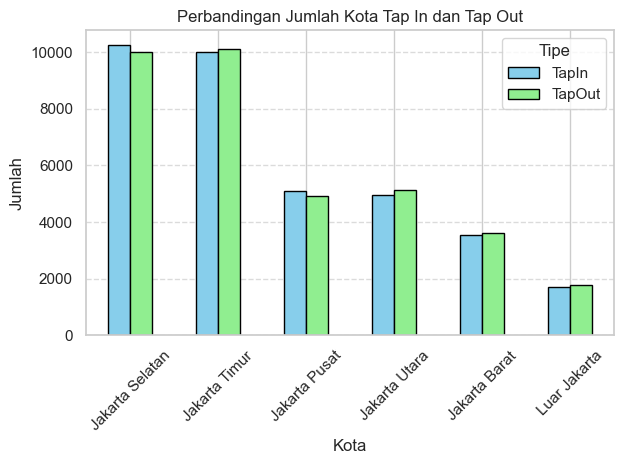

In [143]:
# Visualisasi Grouped Bar Chart

city_counts.plot(kind='bar', color=['skyblue', 'lightgreen'], edgecolor='black')
plt.title('Perbandingan Jumlah Kota Tap In dan Tap Out')
plt.xlabel('Kota')
plt.ylabel('Jumlah')
plt.legend(title='Tipe')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [144]:
# Hitung variasi jumlah rute

route_counts = df.groupby(['kota_tapin', 'kota_tapout']).size().reset_index(name='jumlah')

route_counts = route_counts.sort_values(by='jumlah', ascending=False)

route_counts

,kota_tapin,kota_tapout,jumlah
21,Jakarta Timur,Jakarta Timur,8822
14,Jakarta Selatan,Jakarta Selatan,8412
28,Jakarta Utara,Jakarta Utara,4201
7,Jakarta Pusat,Jakarta Pusat,3256
0,Jakarta Barat,Jakarta Barat,2801
35,Luar Jakarta,Luar Jakarta,984
13,Jakarta Selatan,Jakarta Pusat,709
8,Jakarta Pusat,Jakarta Selatan,692
15,Jakarta Selatan,Jakarta Timur,457
17,Jakarta Selatan,Luar Jakarta,438


## 4.4 Jumlah Halte TJ Berdasarkan Kota

In [145]:
# Menghitung total nilai unique dari tapInStopsName

df['tapInStopsName'].nunique()

2537

In [146]:
# Menghitung total nilai unique dari tapOutStopsName

df['tapOutStopsName'].nunique()

2229

In [147]:
# Buat table baru untuk tapout

halte_kota_tapout = df[['tapOutStopsName', 'kota_tapout']]

In [148]:
# Ganti nama kolom

halte_kota_tapout.columns = ['NamaHalte', 'Kota']


In [149]:
# Buat table baru untuk tapin

halte_kota_tapin = df[['tapInStopsName', 'kota_tapin']]

In [150]:
# Ganti nama kolom

halte_kota_tapin.columns = ['NamaHalte', 'Kota']


In [151]:
# Gabungkan data table tapin dan tapout

halte_kota = pd.concat([halte_kota_tapin, halte_kota_tapout], axis=0)

In [152]:
# Drop duplicates

halte_kota = halte_kota.drop_duplicates()

In [153]:
# Cek data

halte_kota

,NamaHalte,Kota
0,Pal Putih,Jakarta Pusat
1,Kemenkes 2,Jakarta Selatan
2,Gg. Kunir II,Jakarta Barat
3,Taman Elok 1,Jakarta Timur
4,Sunter Boulevard Barat,Jakarta Utara
...,...,...
37856,Simpang Bundaran Ikan Harapan Indah Raya 1,Luar Jakarta
37860,SDN Cengkareng Barat 05,Jakarta Barat
37862,Stasiun Jatinegara Arah Selatan,Jakarta Timur
37890,MNC Studios,Jakarta Barat


In [154]:
# Hitung jumlah halte berdasarkan kota

halte_group = halte_kota.groupby('Kota')['NamaHalte'].count().reset_index(name='JumlahHalte')
halte_group

,Kota,JumlahHalte
0,Jakarta Barat,474
1,Jakarta Pusat,368
2,Jakarta Selatan,857
3,Jakarta Timur,1105
4,Jakarta Utara,611
5,Luar Jakarta,172


## 4.5 Daily commuter di setiap halte TransJakarta?

In [155]:
# Ubah tapInTime ke dalam bentu date saja tanpa time

df['Date'] = df['tapInTime'].dt.date

In [156]:
# Group penumpang per kota

penumpang_per_kota = df.groupby(['Date', 'kota_tapin']).size().reset_index(name='JumlahPenumpang')
penumpang_per_kota = penumpang_per_kota.sort_values(by='JumlahPenumpang', ascending=False)

print(penumpang_per_kota)


           Date       kota_tapin  JumlahPenumpang
76   2023-04-14  Jakarta Selatan              562
106  2023-04-19  Jakarta Selatan              557
94   2023-04-17  Jakarta Selatan              551
100  2023-04-18  Jakarta Selatan              547
70   2023-04-13  Jakarta Selatan              546
..          ...              ...              ...
7    2023-04-02    Jakarta Timur                2
0    2023-04-01    Jakarta Barat                2
5    2023-04-02    Jakarta Barat                1
4    2023-04-01     Luar Jakarta                1
3    2023-04-01    Jakarta Utara                1

[176 rows x 3 columns]


In [157]:
# Hitung jumlah penumpang per tanggal dan kota
penumpang_per_kota = df.groupby(['Date', 'kota_tapin']).size().reset_index(name='JumlahPenumpang')

# Hitung rata-rata harian penumpang per kota
rata_rata_per_kota = penumpang_per_kota.groupby('kota_tapin')['JumlahPenumpang'].mean().reset_index(name='RataRataPenumpang')

# Urutkan dari yang tertinggi ke terendah
rata_rata_per_kota = rata_rata_per_kota.sort_values(by='RataRataPenumpang', ascending=False)

print(rata_rata_per_kota)

        kota_tapin  RataRataPenumpang
2  Jakarta Selatan         341.833333
3    Jakarta Timur         333.633333
1    Jakarta Pusat         182.535714
4    Jakarta Utara         171.344828
0    Jakarta Barat         118.166667
5     Luar Jakarta          59.379310


In [158]:
# Hitung jumlah transaksi unik per hari

transaksi_per_hari = df.groupby('Day_Name')['transID'].nunique().reset_index(name='JumlahTransaksi')
transaksi_per_hari


,Day_Name,JumlahTransaksi
0,Friday,6474
1,Monday,6418
2,Saturday,1721
3,Sunday,1738
4,Thursday,6411
5,Tuesday,6439
6,Wednesday,6410


In [159]:
# Hitung rata-rata penumpang per hari (Senin, Selasa, dst)

rata_rata_per_hari = transaksi_per_hari.groupby('Day_Name')['JumlahTransaksi'].mean().reset_index()
rata_rata_per_hari


,Day_Name,JumlahTransaksi
0,Friday,6474.0
1,Monday,6418.0
2,Saturday,1721.0
3,Sunday,1738.0
4,Thursday,6411.0
5,Tuesday,6439.0
6,Wednesday,6410.0


In [160]:
#Hitung rata-rata dari jumlah transaksi harian

rata_rata_transaksi = transaksi_per_hari['JumlahTransaksi'].mean()
print("Rata-rata transaksi harian:", rata_rata_transaksi)

Rata-rata transaksi harian: 5087.285714285715


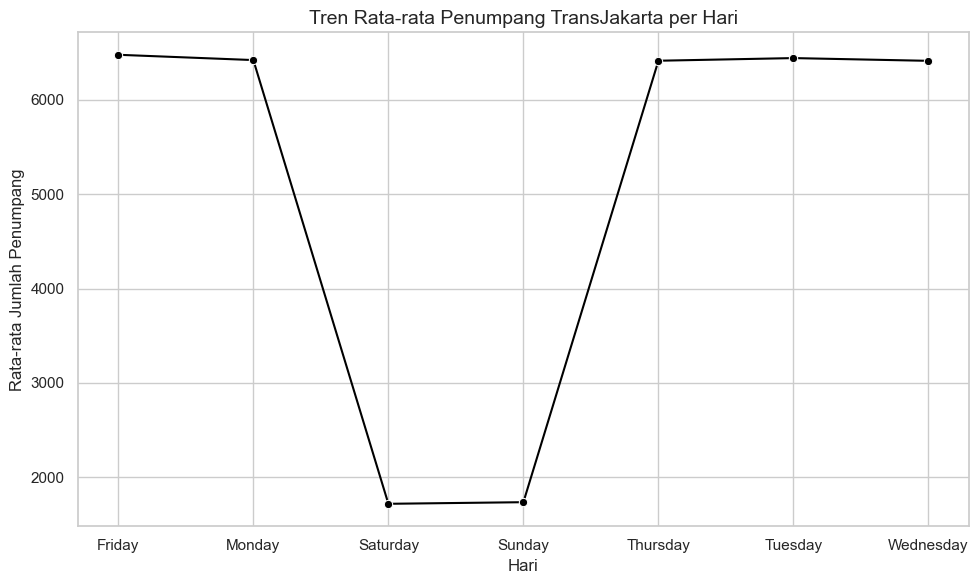

In [161]:
#Visualisasi linechart

plt.figure(figsize=(10, 6))
sns.lineplot(x='Day_Name', y='JumlahTransaksi', data=rata_rata_per_hari, marker='o', color='black')

plt.title('Tren Rata-rata Penumpang TransJakarta per Hari', fontsize=14)
plt.xlabel('Hari', fontsize=12)
plt.ylabel('Rata-rata Jumlah Penumpang', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


## 4.6 Apakah ada perbedaan Rata-rata pendapatan TransJakarta antara hari kerja dan akhir pekan?

Model Tes: Two Sample indenpendent test:

H0: Tidak ada perbedaan rata-rata pendapatan weekdays dan weekend

H1: Terdapat perbedaan rata-rata pendapatan weekdays dan weekend

In [162]:
# Filter for weekdays
weekdays = df[df['DayType'] == 'Weekday'][['tapInTime', 'payAmount']].groupby('tapInTime').sum()

# Filter for weekends
weekend = df[df['DayType'] == 'Weekend'][['tapInTime', 'payAmount']].groupby('tapInTime').sum()


In [163]:
# Menghitung rata-rata pendapatan weekdays dan weekend
print('Average Revenue Weekdays =',weekdays['payAmount'].mean())
print('Average Revenue Weekend =',weekend['payAmount'].mean())

Average Revenue Weekdays = 2716.6322149785337
Average Revenue Weekend = 2489.5621919396926


In [164]:
t_stat, p_val = stats.ttest_ind(weekdays['payAmount'],weekend['payAmount'])
print('T-Statistic:',t_stat)
print('P-value:',p_val) #

T-Statistic: 2.9748931852675056
P-value: 0.0029329121005215813


### Insight:

Berdasarkan Hasil Two Sample Independent test, P-value dengan nilai 0,0029 lebih kecil dari tingkat signifikansi umum 0,05. Artinya, memiliki cukup bukti untuk menolak hipotesis null (H0).

T-Statistic yang positif dan cukup besar (2.97) menunjukkan bahwa rata-rata transaksi pada weekdays secara signifikan lebih tinggi daripada rata-rata transaksi pada weekend

#### Kesimpulan: 
Terdapat perbedaan rata-rata pendapatan weekdays dan weekend dengan pendapatan weekdays lebih tinggi dibandingkan weekend

## 4.7 Dimana titik halte TransJakarta yang merupakan terpadat dan tersepi?

In [165]:
# Mengambil data halte tapin dan tapout
tapIn = df[['tapInStopsName', 'payAmount','kota_tapin']].rename(columns={'tapInStopsName': 'tapStopName', 'kota_tapin':'kota_tap'})
tapIn['TransactionType'] = 'tapIn'

tapOut = df[['tapOutStopsName', 'payAmount','kota_tapout']].rename(columns={'tapOutStopsName': 'tapStopName', 'kota_tapout':'kota_tap'})
tapOut['TransactionType'] = 'tapOut'

# Menggabungkan transaksi halte tapin dan halte tapout
tapStopTransaction = pd.concat([tapIn, tapOut], ignore_index=True)

# Kombinasi groupp berdasarkan transaction type, tapstop name, dan mengkalkulasi
grouped_data = tapStopTransaction.groupby(['TransactionType', 'tapStopName','kota_tap']).size().reset_index(name='count')
grouped_data.sort_values('count',ascending=False)

,TransactionType,tapStopName,kota_tap,count
2579,tapOut,BKN,Jakarta Timur,306
3635,tapOut,Penjaringan,Jakarta Utara,255
1257,tapIn,Penjaringan,Jakarta Utara,224
271,tapIn,Garuda Taman Mini,Jakarta Timur,198
4681,tapOut,Term. Senen,Jakarta Pusat,189
...,...,...,...,...
3024,tapOut,Jln. Gempol Raya,Jakarta Timur,1
3022,tapOut,Jln. Galur Sari Barat 2,Jakarta Timur,1
3021,tapOut,Jln. Gading Sengon Raya 2,Jakarta Utara,1
3020,tapOut,Jln. Gading Raya,Jakarta Utara,1


### 4.7.1 Halte Terpadat

#### 4.7.1.1 Halte Keberangkatan Terpadat

C:\Users\PLN\AppData\Local\Temp\ipykernel_26584\3477152927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=halte_in, x='count', y='tapStopName', palette='viridis')


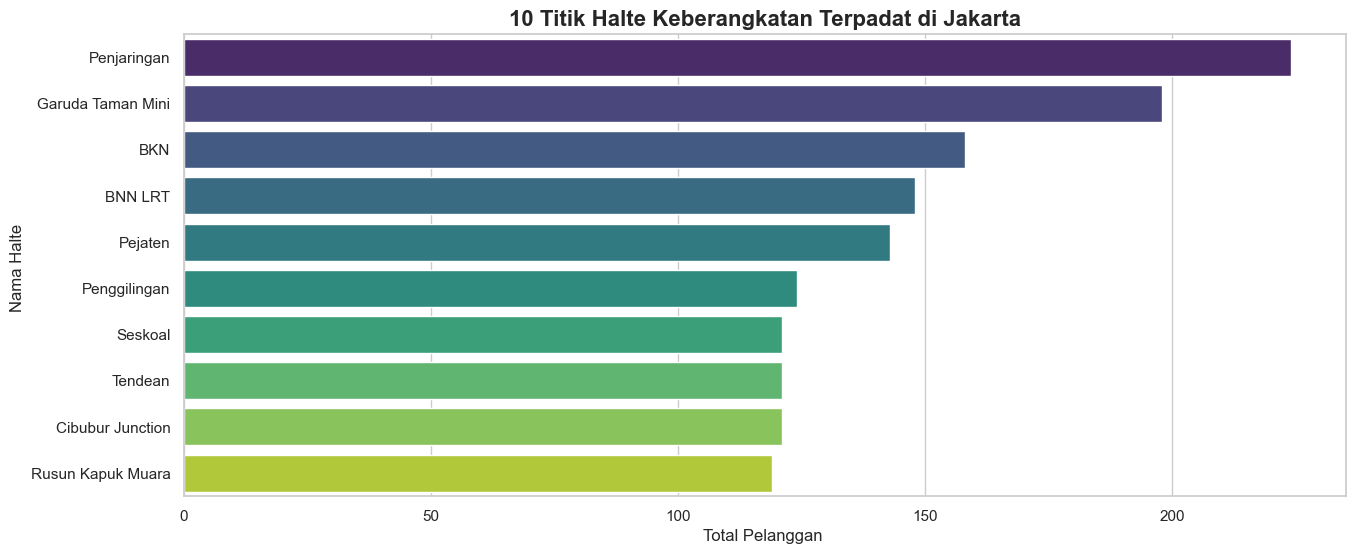

In [166]:
# Variabel untuk Data halte keberangkatan Terpadat
halte_in = grouped_data[grouped_data['TransactionType'] == 'tapIn'].sort_values('count', ascending=False).head(10)


# Visualisasi Data halte tap in Terpadat
plt.figure(figsize=(15, 6))
sns.barplot(data=halte_in, x='count', y='tapStopName', palette='viridis')

#Memasukan semua data
plt.ticklabel_format(style='plain', axis='x', useOffset=False) 
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))  

plt.title("10 Titik Halte Keberangkatan Terpadat di Jakarta", fontsize=16, fontweight='bold')
plt.xlabel('Total Pelanggan ')
plt.ylabel('Nama Halte ')
plt.show()

#### 4.7.2.2 Halte Tujuan Terpadat

C:\Users\PLN\AppData\Local\Temp\ipykernel_26584\840560789.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=halte_out, x='count', y='tapStopName', palette='viridis')


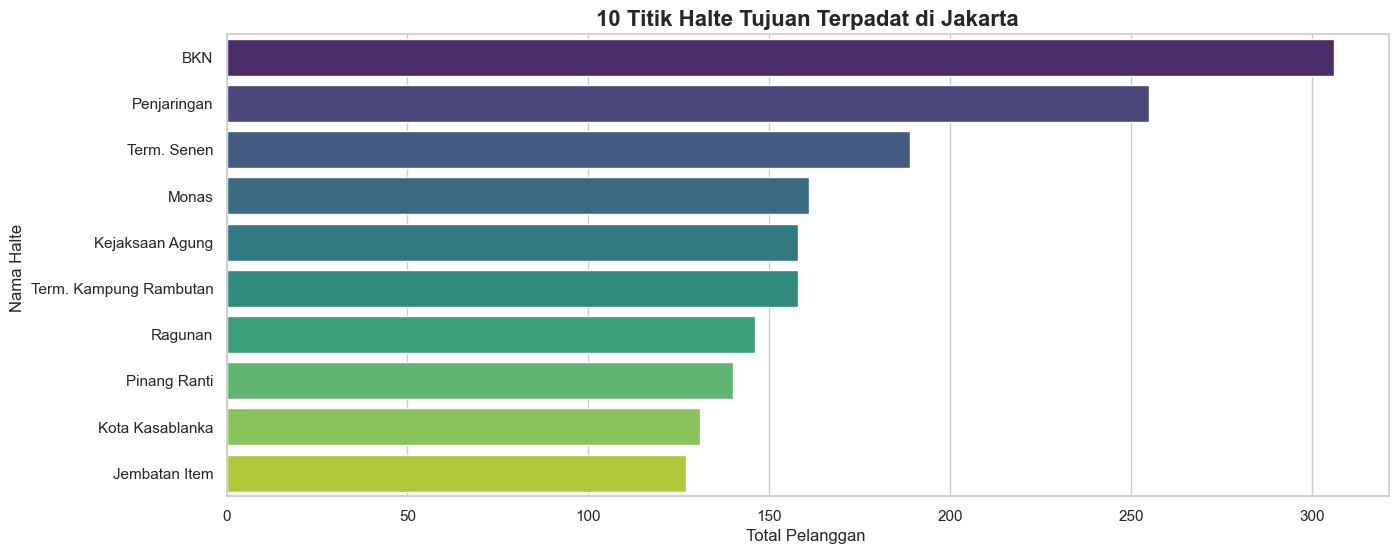

In [167]:
# Halte Tujuan terpadat
halte_out = grouped_data[grouped_data['TransactionType'] == 'tapOut'].sort_values('count', ascending=False).head(10)

# Visualisasi Data Tujuan Terpadat
plt.figure(figsize=(15, 6))
sns.barplot(data=halte_out, x='count', y='tapStopName', palette='viridis')

#Memasukan semua data
plt.ticklabel_format(style='plain', axis='x', useOffset=False) 
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))  

plt.title("10 Titik Halte Tujuan Terpadat di Jakarta", fontsize=16, fontweight='bold')
plt.xlabel('Total Pelanggan ')
plt.ylabel('Nama Halte ')
plt.show()

### 4.7.2 Halte Tersepi

#### 4.7.2.1 Halte Keberangkatan Tersepi

In [168]:
# Variabel untuk Data halte keberangkatan Tersepi
halte_in_sepi = grouped_data[grouped_data['TransactionType'] == 'tapIn'].sort_values('count', ascending=True)

In [169]:
halte_in_sepi_1 = halte_in_sepi[halte_in_sepi['count']==1]
halte_in_sepi_1

,TransactionType,tapStopName,kota_tap,count
2536,tapIn,Yos Sudarso Kodamar,Jakarta Utara,1
932,tapIn,Komplek DPR Bumi Sanggraha,Jakarta Timur,1
930,tapIn,Komplek Beacukai Pondok Bambu,Jakarta Timur,1
2023,tapIn,Sbr. SDN Sunter Agung 09,Jakarta Utara,1
928,tapIn,Komplek Angkasa Halim PK,Jakarta Timur,1
...,...,...,...,...
100,tapIn,Bidara Cina 2,Jakarta Timur,1
101,tapIn,Billy Moon,Jakarta Timur,1
102,tapIn,Bimbel Calistung,Jakarta Timur,1
15,tapIn,Al-Wathoniyah,Jakarta Timur,1


C:\Users\PLN\AppData\Local\Temp\ipykernel_26584\1292465534.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=halte_in_sepi2, x='count', y='kota_tap', palette='viridis')


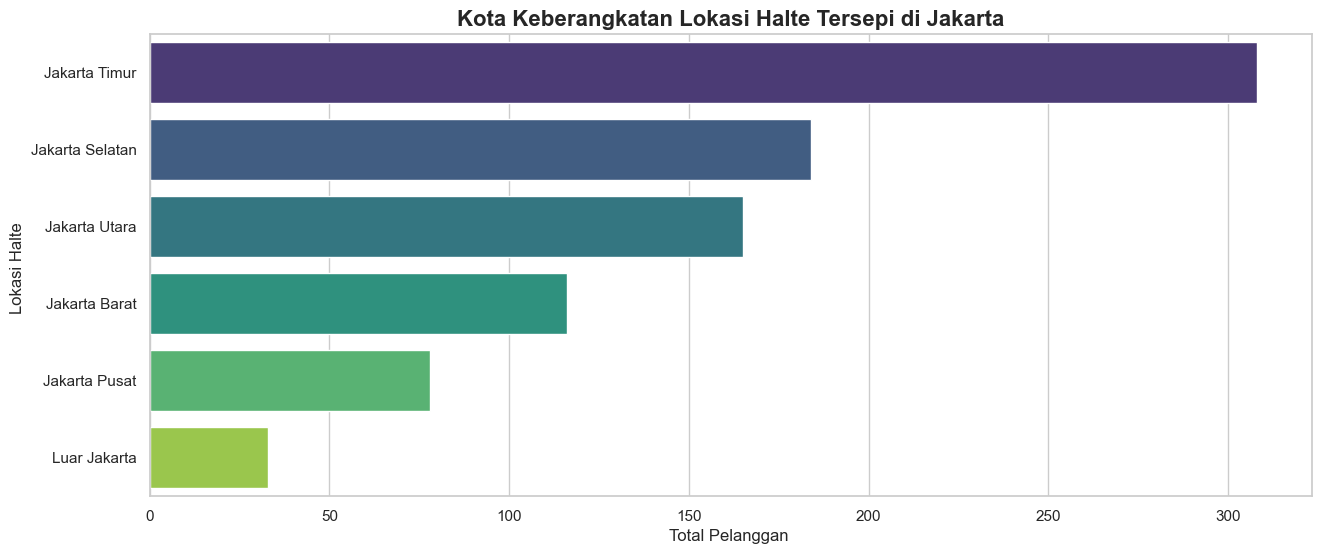

In [170]:
# Halte Keberangkatan tersepi
halte_in_sepi2 = halte_in_sepi_1.groupby(['kota_tap']).count().sort_values(by='count', ascending=False)

# Visualisasi Data keberangkatan Tesepi
plt.figure(figsize=(15, 6))
sns.barplot(data=halte_in_sepi2, x='count', y='kota_tap', palette='viridis')

#Memasukan semua data
plt.ticklabel_format(style='plain', axis='x', useOffset=False) 
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))  

plt.title("Kota Keberangkatan Lokasi Halte Tersepi di Jakarta", fontsize=16, fontweight='bold')
plt.xlabel('Total Pelanggan ')
plt.ylabel('Lokasi Halte ')
plt.show()

#### 4.7.2.1 Halte Tap Out Tersepi

In [171]:
# Variabel untuk Data halte keberangkatan Tersepi
halte_out_sepi = grouped_data[grouped_data['TransactionType'] == 'tapOut'].sort_values('count', ascending=True)
halte_out_sepi

,TransactionType,tapStopName,kota_tap,count
3651,tapOut,Pertigaan Duren Tiga Raya,Jakarta Selatan,1
3939,tapOut,SDN Cengkareng Barat 05,Jakarta Barat,1
3938,tapOut,SDN Batu Ampar 02 03,Jakarta Timur,1
3083,tapOut,Jln. Kemandoran VI Grogol Utara,Jakarta Selatan,1
3926,tapOut,Rusun Rorotan,Jakarta Utara,1
...,...,...,...,...
4672,tapOut,Term. Kampung Rambutan,Jakarta Timur,158
3536,tapOut,Monas,Jakarta Pusat,161
4681,tapOut,Term. Senen,Jakarta Pusat,189
3635,tapOut,Penjaringan,Jakarta Utara,255


In [172]:
halte_out_sepi_1 = halte_out_sepi[halte_out_sepi['count']==1]

C:\Users\PLN\AppData\Local\Temp\ipykernel_26584\1740511524.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=halte_out_sepi2, x='count', y='kota_tap', palette='viridis')


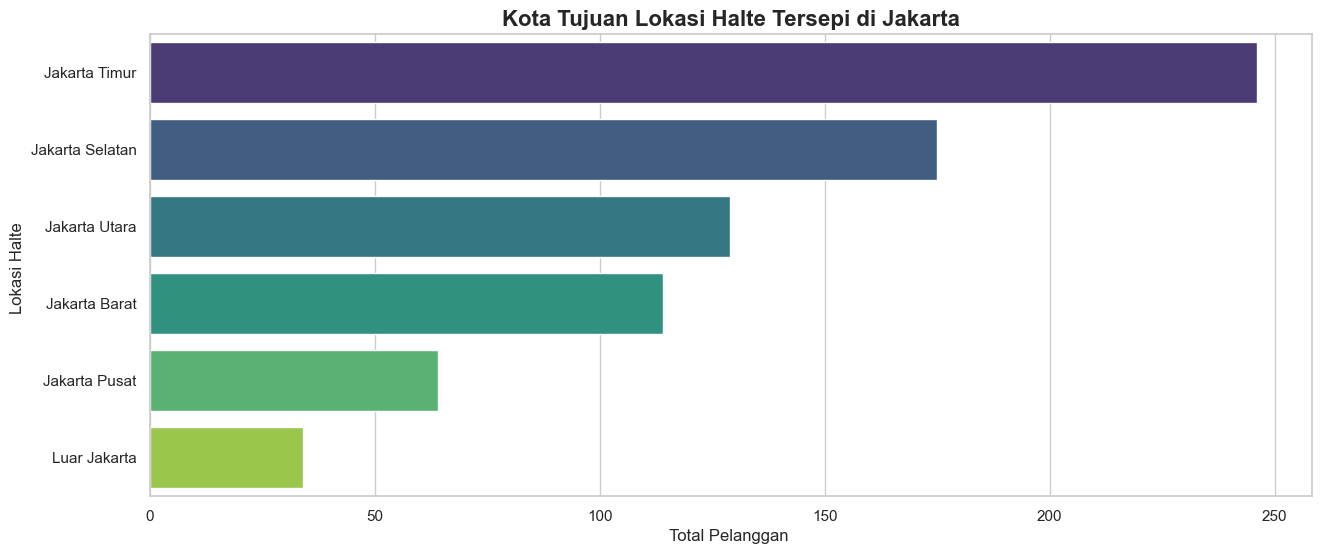

In [173]:
# Halte Tujuan tersepi
halte_out_sepi2 = halte_out_sepi_1.groupby(['kota_tap']).count().sort_values(by='count', ascending=False)

# Visualisasi Data Tujuan Tesepi
plt.figure(figsize=(15, 6))
sns.barplot(data=halte_out_sepi2, x='count', y='kota_tap', palette='viridis')

#Memasukan semua data
plt.ticklabel_format(style='plain', axis='x', useOffset=False) 
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))  

plt.title("Kota Tujuan Lokasi Halte Tersepi di Jakarta", fontsize=16, fontweight='bold')
plt.xlabel('Total Pelanggan ')
plt.ylabel('Lokasi Halte ')
plt.show()

## 4.8 Berapa rata-rata waktu tempuh pengguna Trans Jakarta? 

In [174]:
#Menghitung durasi tempuh dalam per menit
df['duration'] = (df['tapOutTime'] - df['tapInTime']).dt.total_seconds() / 60

df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,...,payAmount,Age,Day,Day_Name,DayType,kota_tapin,kota_tapout,AgeGroup,Date,duration
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,P00142,Pal Putih,-6.184631,106.84402,...,3500.0,15,0,Monday,Weekday,Jakarta Pusat,Jakarta Timur,11-17,2023-04-03,39.150000
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,B01963P,Kemenkes 2,-6.228700,106.83302,...,3500.0,26,0,Monday,Weekday,Jakarta Selatan,Jakarta Selatan,25-40,2023-04-03,57.283333
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,B00499P,Gg. Kunir II,-6.133132,106.81435,...,3500.0,31,0,Monday,Weekday,Jakarta Barat,Jakarta Barat,25-40,2023-04-03,51.816667
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,B05587P,Taman Elok 1,-6.195743,106.93526,...,3500.0,45,0,Monday,Weekday,Jakarta Timur,Jakarta Timur,41-59,2023-04-03,43.416667
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,P00239,Sunter Boulevard Barat,-6.149650,106.88900,...,3500.0,41,0,Monday,Weekday,Jakarta Utara,Jakarta Barat,41-59,2023-04-03,39.466667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,P00261,Tosari,-6.196892,106.82309,...,3500.0,19,4,Friday,Weekday,Jakarta Pusat,Jakarta Selatan,18-24,2023-04-21,97.200000
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,P00064,Garuda Taman Mini,-6.290154,106.88116,...,3500.0,49,1,Tuesday,Weekday,Jakarta Timur,Jakarta Timur,41-59,2023-04-18,35.850000
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,B02873P,Plaza Sentral,-6.216247,106.81676,...,20000.0,47,1,Tuesday,Weekday,Jakarta Selatan,Luar Jakarta,41-59,2023-04-04,177.633333
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,B02505P,Museum Textile,-6.188656,106.80954,...,0.0,47,5,Saturday,Weekend,Jakarta Barat,Jakarta Pusat,41-59,2023-04-15,28.400000


count    35611.000000
mean        72.151438
std         28.064003
min         15.000000
25%         51.150000
50%         71.916667
75%         95.800000
max        179.050000
Name: duration, dtype: float64


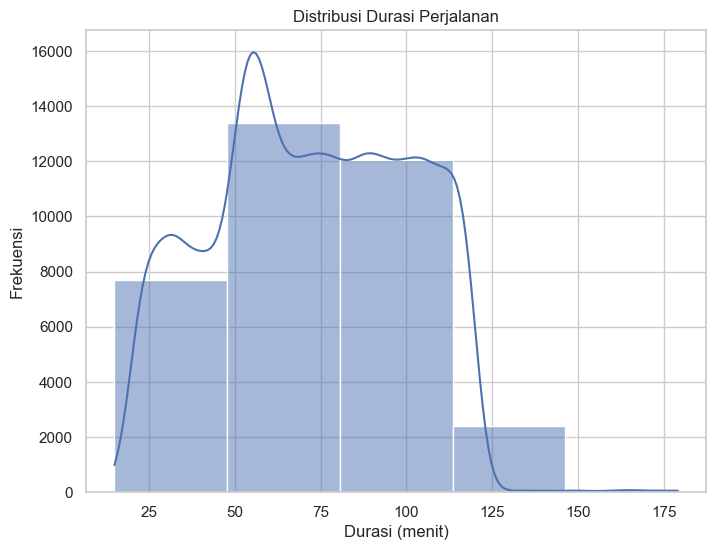

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns

# Statistik deskriptif
print(df['duration'].describe())

# Histogram durasi
plt.figure(figsize=(8, 6))
sns.histplot(df['duration'], bins=5, kde=True)
plt.title('Distribusi Durasi Perjalanan')
plt.xlabel('Durasi (menit)')
plt.ylabel('Frekuensi')
plt.show()

## 4.9 Halte Pendapatan Tertinggi dan Terendah

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung pendapatan
count_tap = df.groupby(['tapOutStopsName'], as_index=False)['payAmount'].sum()


print(count_tap['payAmount'].describe().round(3))

count       2229.000
mean       42176.312
std       123513.744
min            0.000
25%            0.000
50%            0.000
75%        24500.000
max      1760000.000
Name: payAmount, dtype: float64


In [177]:
#Variabel Halte yang memiliki penghasilan
count_tap_valid = count_tap[count_tap['payAmount'] != 0]

In [178]:
#Halte yang tidak memiliki pendapatan di jakarta
count_tap_null = count_tap[count_tap['payAmount'] == 0]
print(f"Total Halte tidak ada penghasilan : {count_tap_null['tapOutStopsName'].nunique()} Halte")

Total Halte tidak ada penghasilan : 1303 Halte


### 4.9.1 Halte Pendapatan Tertinggi 

C:\Users\PLN\AppData\Local\Temp\ipykernel_26584\4223417485.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=count_tap_top5, x='payAmount', y='tapOutStopsName', palette='viridis')


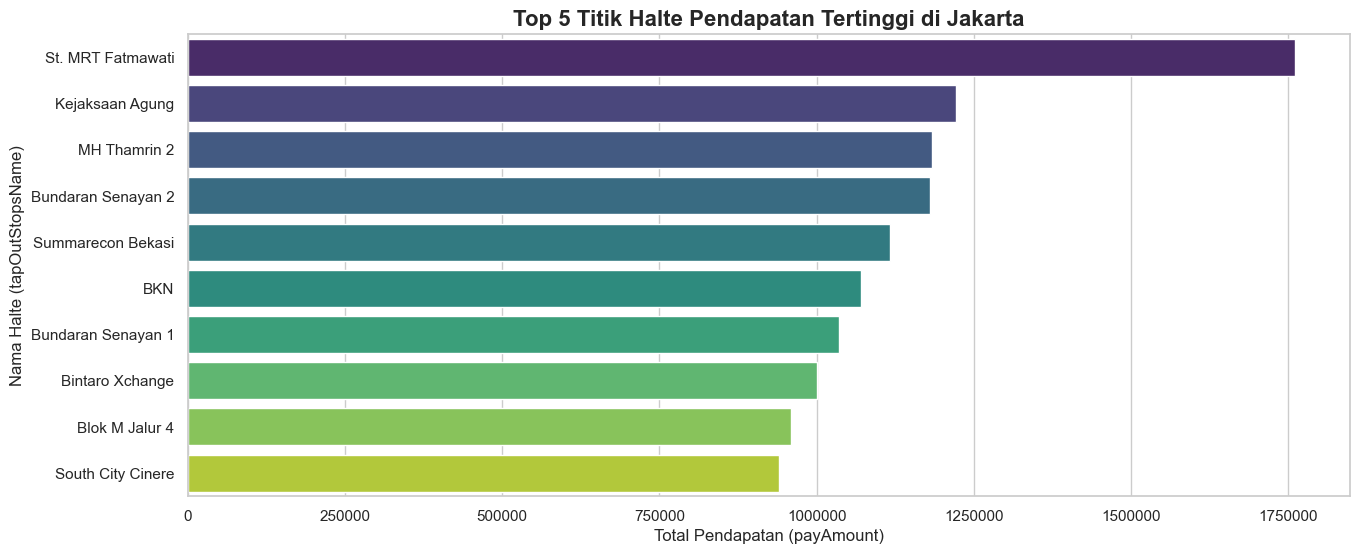

In [179]:

# Mengambil data 10 halte pendapatan tertinggi 
count_tap_top5 = count_tap_valid .sort_values('payAmount', ascending=False).head(10)

# Visualisasi Data Tertinggi
plt.figure(figsize=(15, 6))
sns.barplot(data=count_tap_top5, x='payAmount', y='tapOutStopsName', palette='viridis')

#Memasukan semua data
plt.ticklabel_format(style='plain', axis='x', useOffset=False) 
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))  

plt.title("Top 5 Titik Halte Pendapatan Tertinggi di Jakarta", fontsize=16, fontweight='bold')
plt.xlabel('Total Pendapatan (payAmount)')
plt.ylabel('Nama Halte (tapOutStopsName)')
plt.show()

### 4.9.2 Halte Pendapatan Terendah

C:\Users\PLN\AppData\Local\Temp\ipykernel_26584\480757510.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=count_tap_low5, x='payAmount', y='tapOutStopsName', palette='viridis')


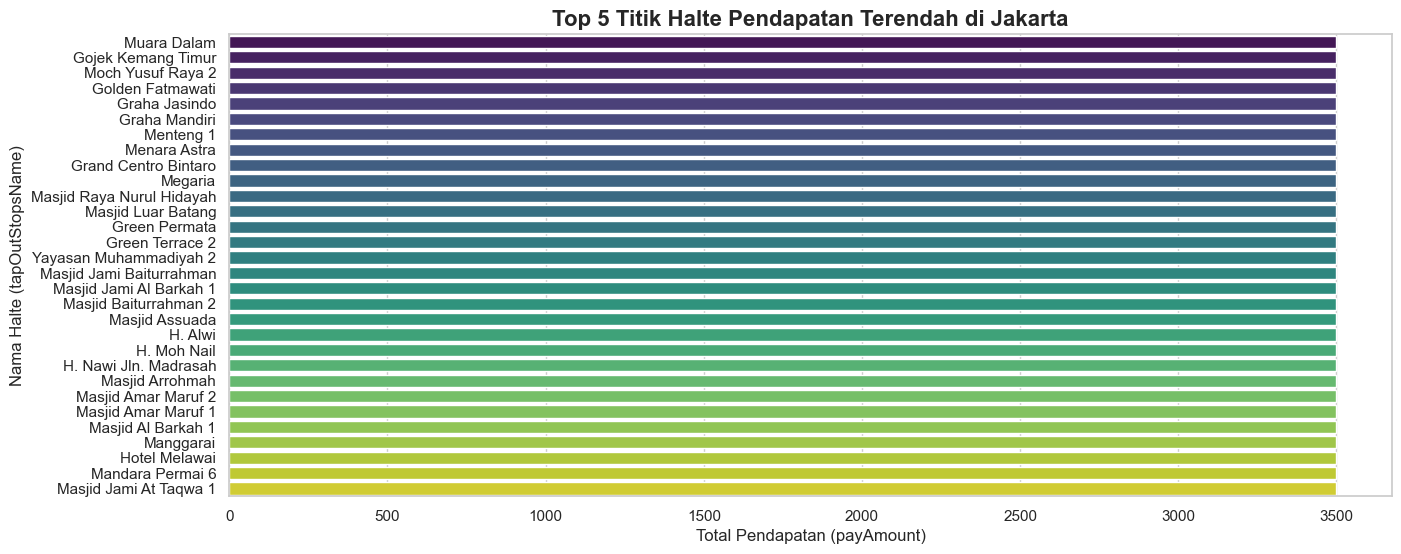

In [180]:
# Sort untuk paymount dascending
count_tap_low5 = count_tap_valid .sort_values('payAmount', ascending=True).head(30)

# Visualisasi Data Terendah
plt.figure(figsize=(15, 6))
sns.barplot(data=count_tap_low5, x='payAmount', y='tapOutStopsName', palette='viridis')

#Memasukan semua data
plt.ticklabel_format(style='plain', axis='x', useOffset=False) 
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))  

plt.title("Top 5 Titik Halte Pendapatan Terendah di Jakarta", fontsize=16, fontweight='bold')
plt.xlabel('Total Pendapatan (payAmount)')
plt.ylabel('Nama Halte (tapOutStopsName)')
plt.show()

# 5. Data Saving

In [181]:
# Save data ke CSV
df.to_csv('df_clean.csv', index=False)